In [ ]:
"""
This notebook is for cleaning and exploring the wildfire occurences in USA from the NASA FIRMS ACTIVE FIRE API
You can refer to the link to get all the documentation needed for the same - https://firms.modaps.eosdis.nasa.gov/api/

Description of all attributes used within the dataset can be found here - # What each attribute means can be found here - https://pyronear.org/pyro-risks/overview/datasets/NASA-FIRMS_ACTIVE-FIRE_VIIRS.html

"""

In [20]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [21]:
wildfire_df=pd.read_csv('../Datasets/wildfire_df.csv')

C:\Users\Olan\AppData\Local\Temp\ipykernel_43420\1408397217.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  wildfire_df=pd.read_csv('../Datasets/wildfire_df.csv')


In [3]:
wildfire_df

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
0        38.54220  -78.30470      304.80  2.80   1.60  2000-11-01       250   
1        38.54510  -78.31070      309.90  2.80   1.60  2000-11-01       250   
2        38.55630  -78.30840      309.40  2.80   1.60  2000-11-01       250   
3        38.55860  -78.31700      302.30  2.80   1.60  2000-11-01       250   
4        31.33930  -89.91240      304.90  1.00   1.00  2000-11-01       427   
...           ...        ...         ...   ...    ...         ...       ...   
8056075  46.92488 -115.19395      346.22  0.43   0.38  2024-09-01      2042   
8056076  46.92831 -115.19494      339.06  0.43   0.38  2024-09-01      2042   
8056077  47.47063 -122.04916      329.90  0.42   0.38  2024-09-01      2042   
8056078  47.57163 -122.37090      333.35  0.43   0.38  2024-09-01      2042   
8056079  48.38913 -120.62041      335.09  0.39   0.36  2024-09-01      2042   

        satellite instrument confidence version  bright_ti5    frp daynight  \
0           Terra      MODIS          l    6.03      280.90  40.30        N   
1           Terra      MODIS          h    6.03      280.70  58.80        N   
2           Terra      MODIS          h    6.03      280.40  54.50        N   
3           Terra      MODIS          n    6.03      279.80  36.00        N   
4           Terra      MODIS          n    6.03      287.50   8.50        N   
...           ...        ...        ...     ...         ...    ...      ...   
8056075       N21      VIIRS          n  2.0NRT      304.32  11.56        D   
8056076       N21      VIIRS          n  2.0NRT      305.63  11.56        D   
8056077       N21      VIIRS          n  2.0NRT      298.05   2.96        D   
8056078       N21      VIIRS          n  2.0NRT      302.97   8.27        D   
8056079       N21      VIIRS          l  2.0NRT      306.09   6.48        D   

         type       state  
0         0.0    Maryland  
1         0.0    Maryland  
2         0.0    Maryland  
3         0.0    Maryland  
4         0.0   Louisiana  
...       ...         ...  
8056075   0.0       Idaho  
8056076   0.0       Idaho  
8056077   0.0  Washington  
8056078   0.0  Washington  
8056079   0.0  Washington  

[8056080 rows x 16 columns]

In [4]:
wildfire_df.describe()

latitude     longitude    bright_ti4          scan         track  \
count  8.056080e+06  8.056080e+06  8.056080e+06  8.056080e+06  8.056080e+06   
mean   3.717890e+01 -1.022963e+02  3.268195e+02  6.339973e-01  5.945212e-01   
std    6.520112e+00  1.442382e+01  2.107832e+01  5.206483e-01  2.964888e-01   
min    2.439600e+01 -1.249998e+02  2.073800e+02  3.200000e-01  3.600000e-01   
25%    3.195011e+01 -1.159892e+02  3.075800e+02  4.000000e-01  3.900000e-01   
50%    3.684748e+01 -1.021159e+02  3.284000e+02  4.600000e-01  4.900000e-01   
75%    4.225504e+01 -8.997397e+01  3.415000e+02  5.700000e-01  6.600000e-01   
max    4.938400e+01 -6.693423e+01  5.062000e+02  4.800000e+00  2.000000e+00   

           acq_time    bright_ti5           frp          type  
count  8.056080e+06  8.056080e+06  8.056080e+06  8.056080e+06  
mean   1.449728e+03  2.932845e+02  1.772331e+01  2.258626e-01  
std    5.484185e+02  1.224352e+01  7.131822e+01  6.642340e-01  
min    1.380000e+02  0.000000e+00  0.000000e+00  0.000000e+00  
25%    9.060000e+02  2.859300e+02  1.860000e+00  0.000000e+00  
50%    1.752000e+03  2.922000e+02  4.870000e+00  0.000000e+00  
75%    1.939000e+03  2.997300e+02  1.279000e+01  0.000000e+00  
max    2.231000e+03  4.233400e+02  1.324670e+04  3.000000e+00

In [5]:
wildfire_df.dtypes

latitude      float64
longitude     float64
bright_ti4    float64
scan          float64
track         float64
acq_date       object
acq_time        int64
satellite      object
instrument     object
confidence     object
version        object
bright_ti5    float64
frp           float64
daynight       object
type          float64
state          object
dtype: object

In [6]:
wildfire_df.isna().sum() 

latitude      0
longitude     0
bright_ti4    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_ti5    0
frp           0
daynight      0
type          0
state         0
dtype: int64

In [7]:
"""
The confidence column has some values as numeric and some as n (normal), l(low) and h(high).
The code below identifies what proportion of the data belongs to numeric/categorical. The quantity in minority will be converted
accordingly.
"""
count_non_numeric=len(wildfire_df[(wildfire_df['confidence']=='l') | (wildfire_df['confidence']=='n') | (wildfire_df['confidence']=='h')])
print("Percentage of rows where confidence is non-numeric is :",(count_non_numeric/len(wildfire_df)) * 100)

Percentage of rows where confidence is non-numeric is : 100.0


In [8]:
"""Observed that about only about 15% of the data within the confidence attribute is numeric.
Hence applying a custom standardization logic by binning them accordingly
"""
def standardize_confidence(value):
    try:
        value=float(value)
        if(value<=33.3):
            return 'l'
        elif(value>33.3 and value<66.6):
            return 'n'
        elif(value>=66.6):
            return 'h'
    except:
        return value
wildfire_df['confidence']=wildfire_df['confidence'].astype(str)     
wildfire_df['confidence']=wildfire_df['confidence'].apply(standardize_confidence)

### Plots

<Axes: xlabel='confidence', ylabel='Count'>

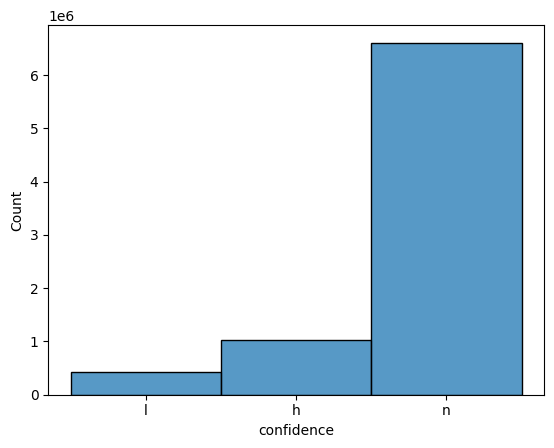

In [9]:
sns.histplot(wildfire_df['confidence'])

<Axes: xlabel='satellite', ylabel='Count'>

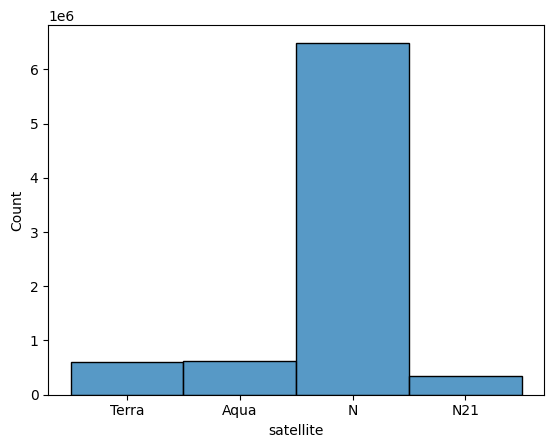

In [10]:
sns.histplot(wildfire_df['satellite'])

<Axes: xlabel='instrument', ylabel='Count'>

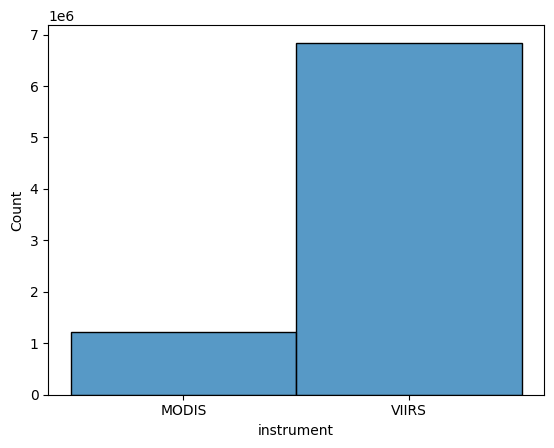

In [11]:
sns.histplot(wildfire_df['instrument'])

<Axes: xlabel='type', ylabel='Count'>

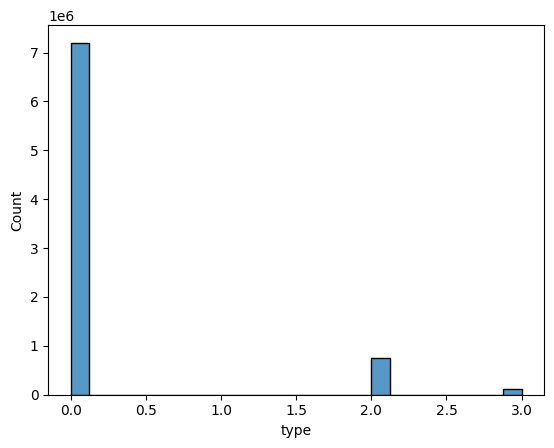

In [12]:
sns.histplot(wildfire_df['type'])

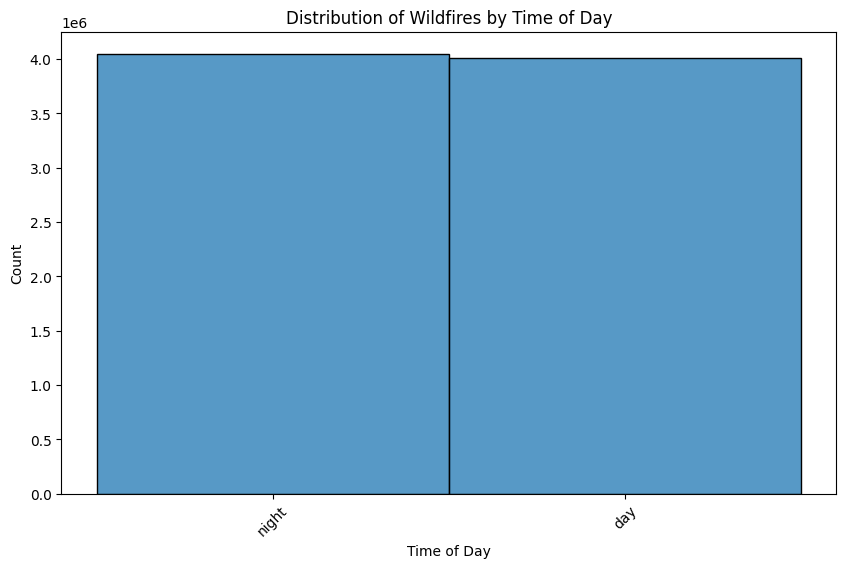

In [28]:
def time_of_day(time):
    if '06:00:00' <= time <= '18:00:00':
        return "day"
    else:
        return "night"


time_df['acq_time'] = wildfire_df['acq_time'].astype(str).str.zfill(4)  # Ensure leading zeros for hours < 10
time_df['acq_time'] = pd.to_datetime(time_df['acq_time'], format='%H%M').dt.time
time_df['time_of_day'] = time_df['acq_time'].apply(lambda x: time_of_day(x.strftime('%H:%M:%S')))

plt.figure(figsize=(10, 6))
sns.histplot(time_df['time_of_day'], discrete=True)
plt.title('Distribution of Wildfires by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

In [9]:
"""Column "Type" has some NaN's, hence filling it with mode = 0"""

wildfire_df['type'] = wildfire_df['type'].fillna(0)

In [13]:
# wildfire_df.to_csv('../Datasets/wildfire_df.csv',index=False)

In [18]:
# !pip3 install geodatasets cartopy geopandas

### Visualizing the wildfire trend across the United States of America from 2000-2024

In [19]:
import geopandas
import matplotlib.pyplot as plt
from cartopy import crs as ccrs
from geodatasets import get_path

In [24]:
path = get_path("naturalearth.land")
world = geopandas.read_file(path)

In [58]:
years=['2000','2001','2002','2003','2004','2005','2006',
       '2007','2008','2009','2010','2011','2012','2013',
       '2014','2015','2016','2017','2018','2019','2020',
       '2021','2022','2023','2024']

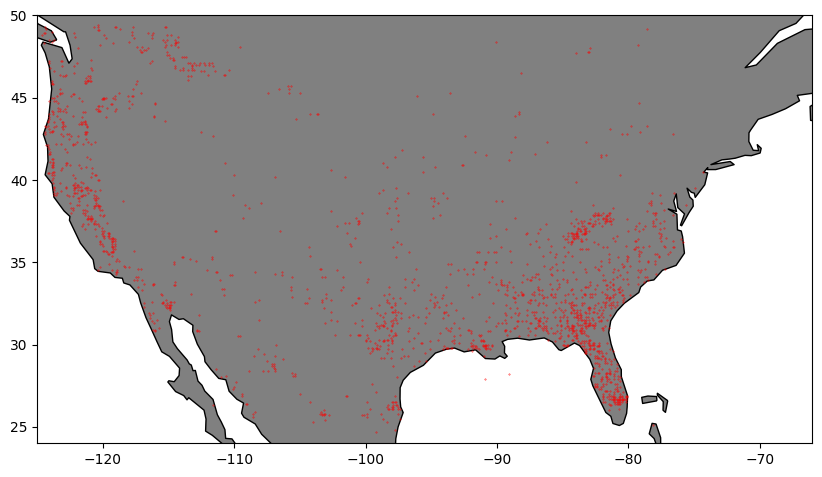

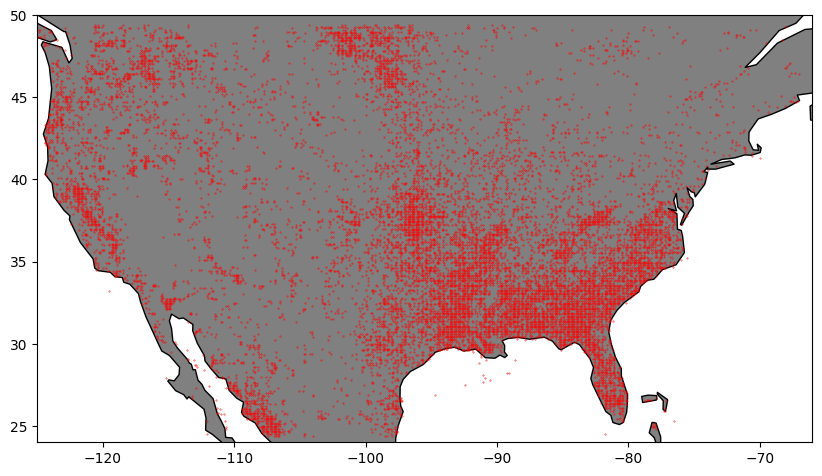

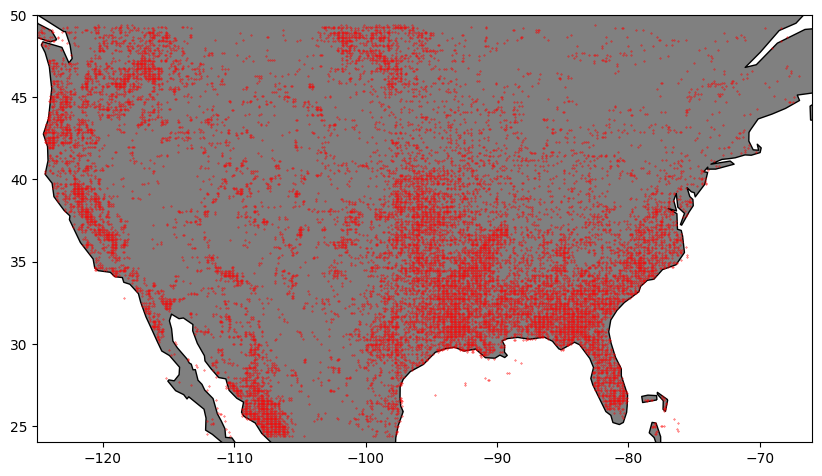

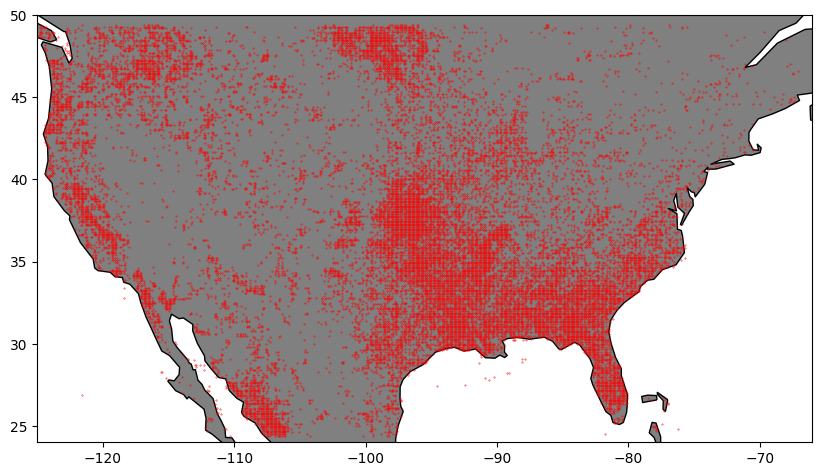

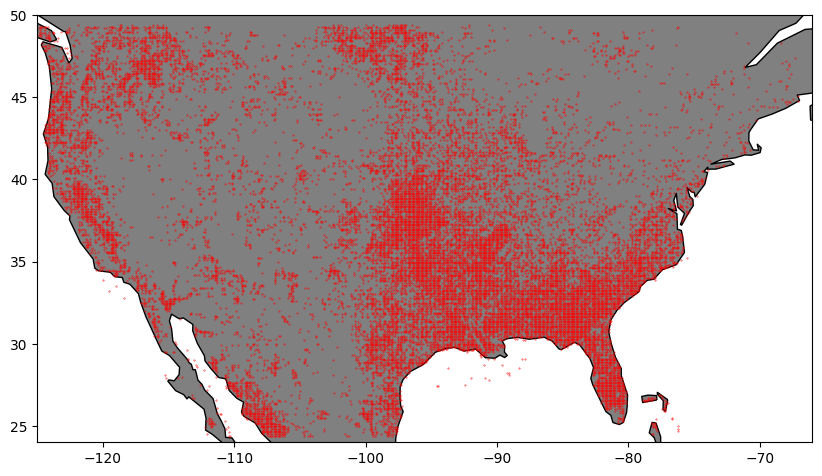

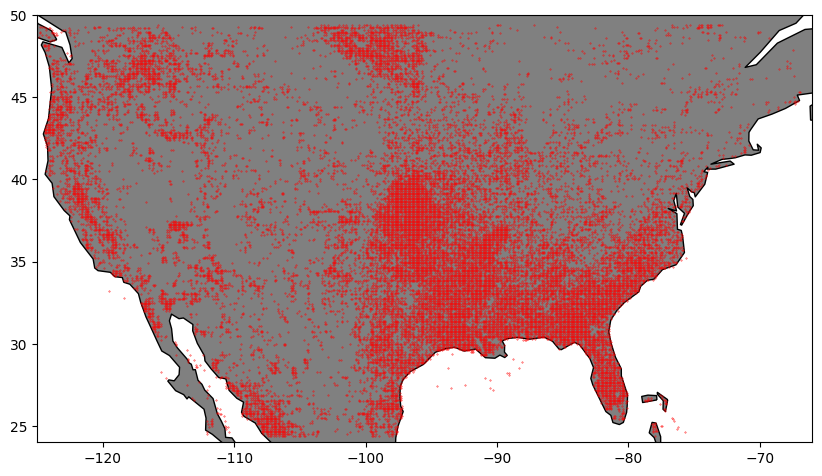

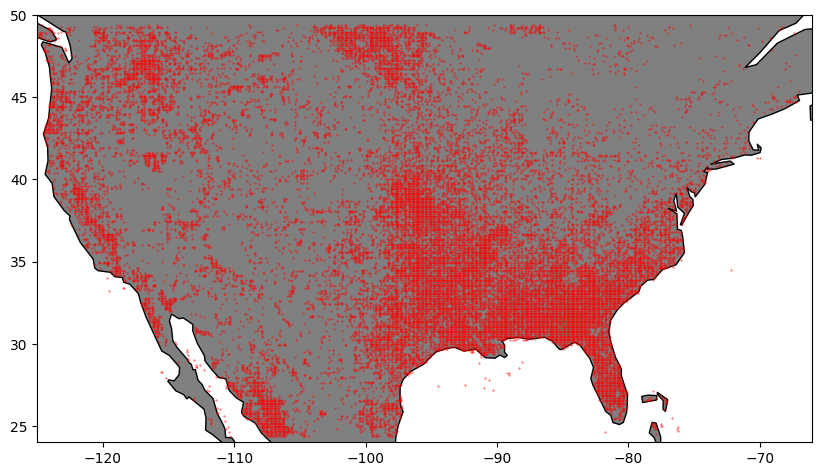

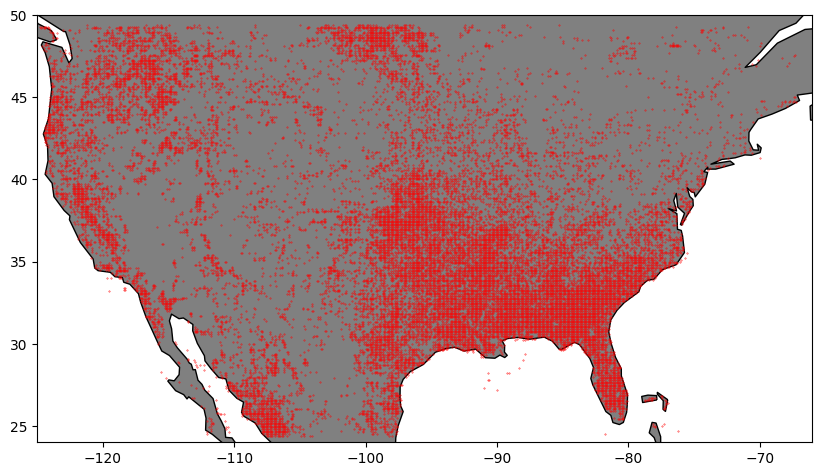

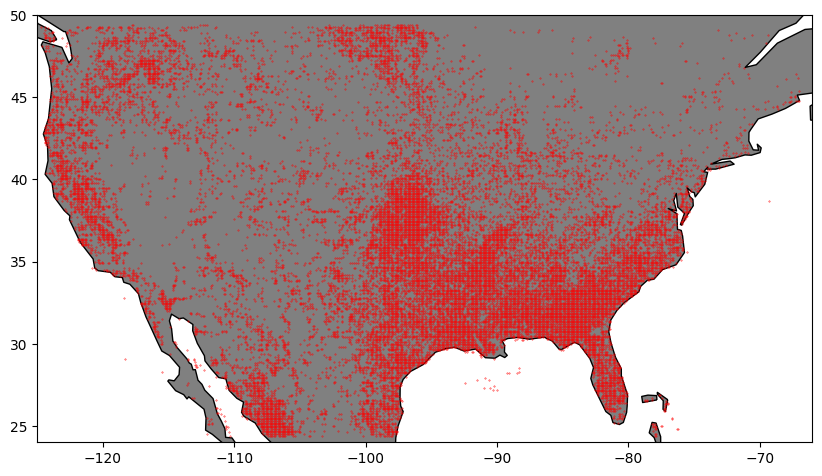

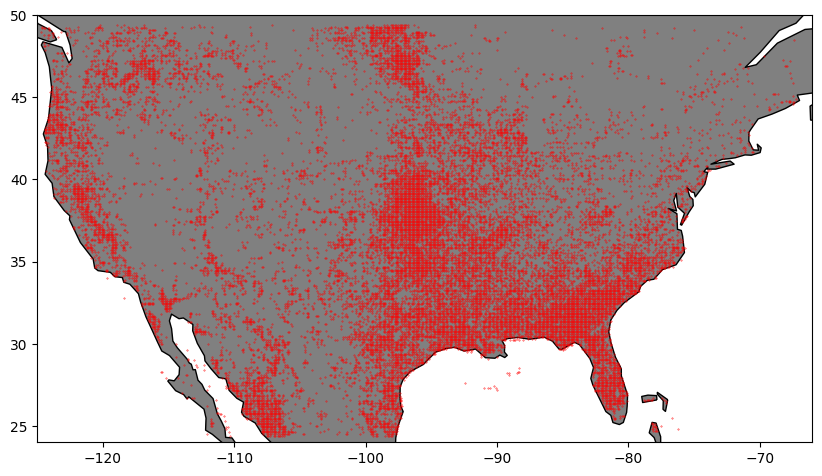

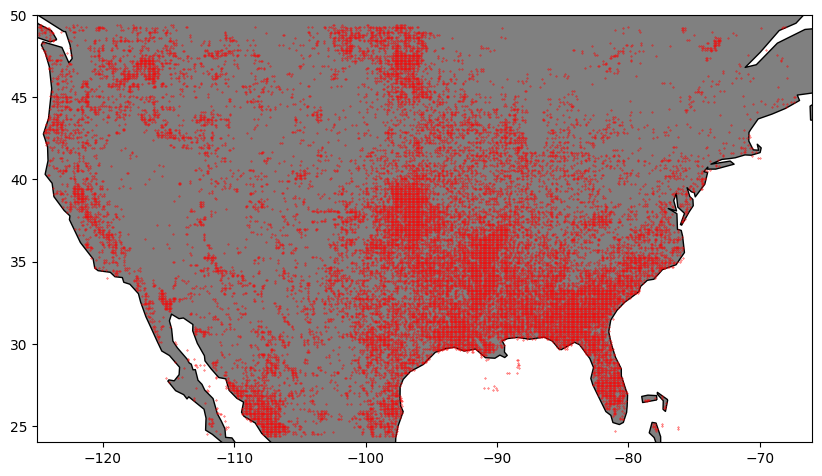

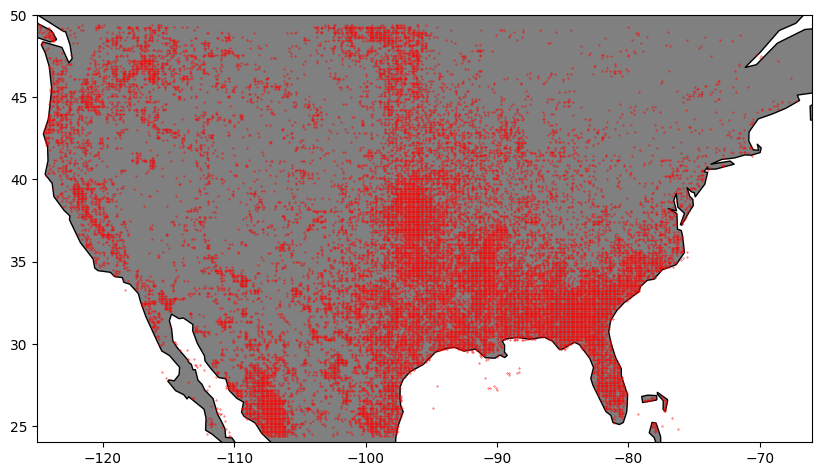

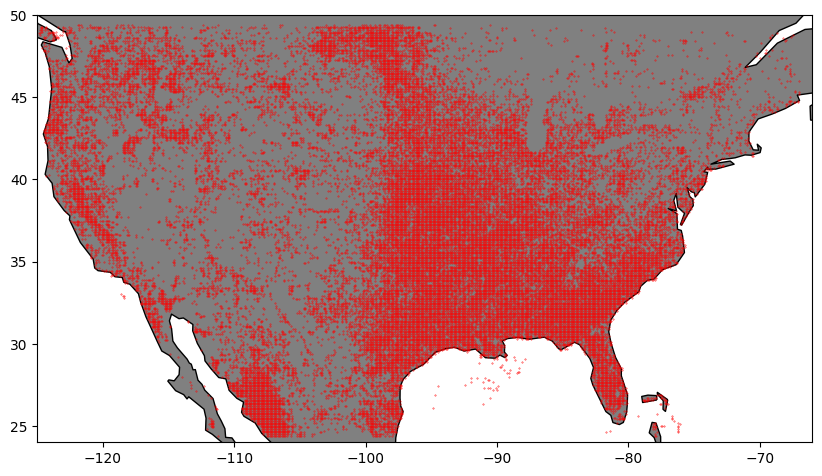

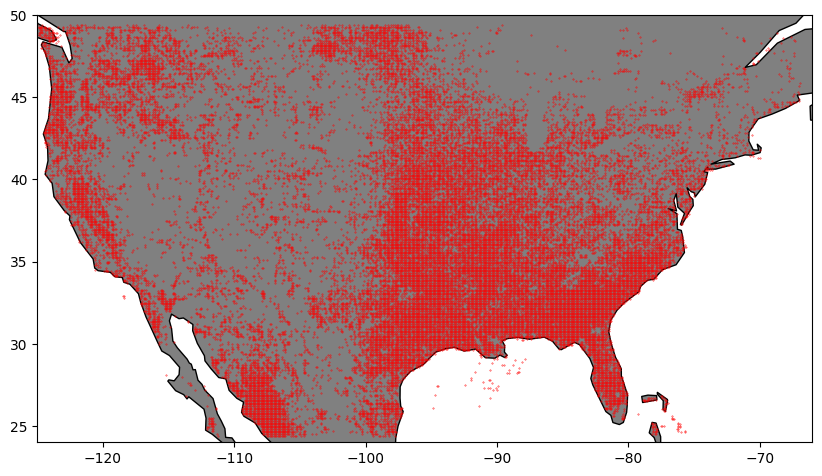

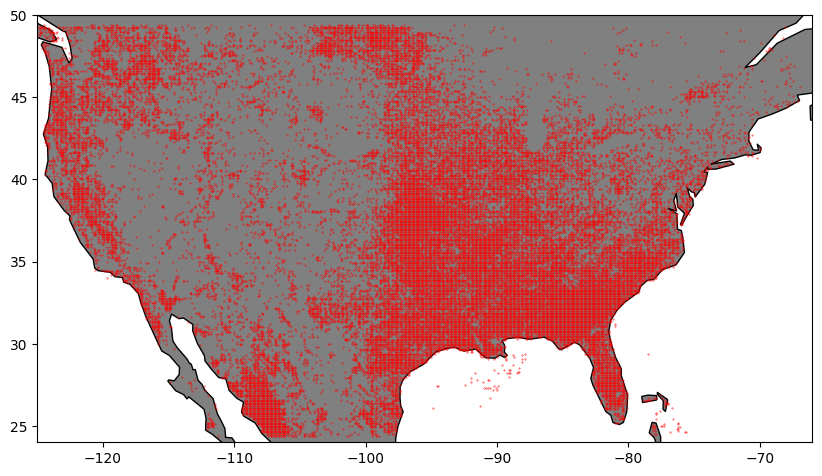

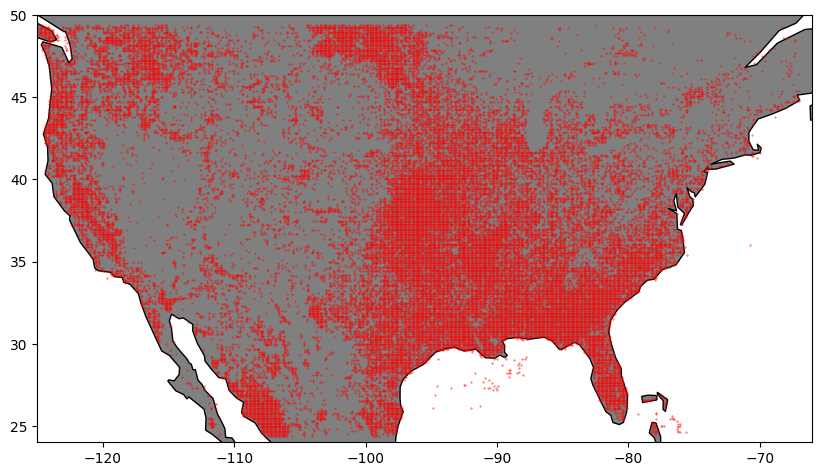

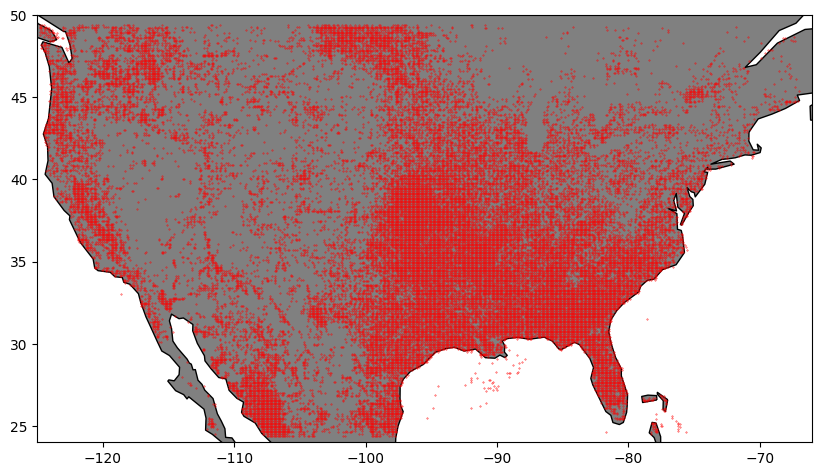

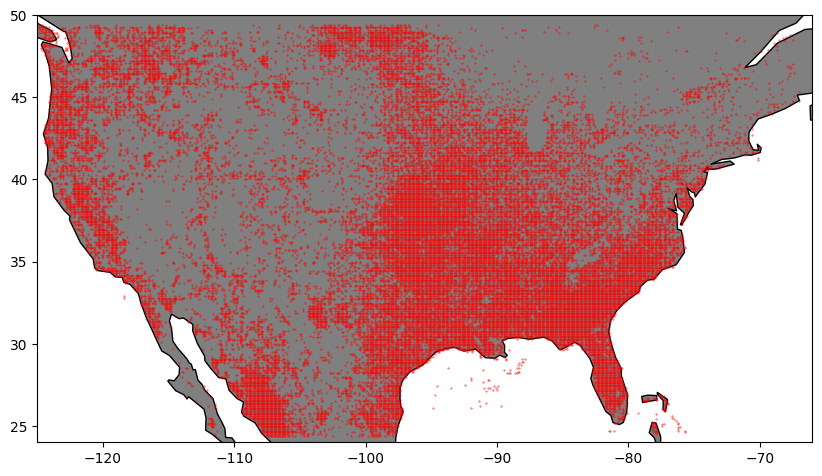

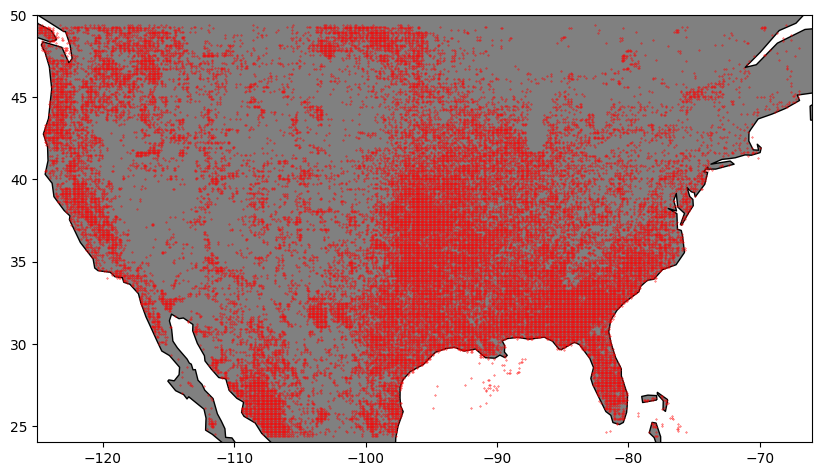

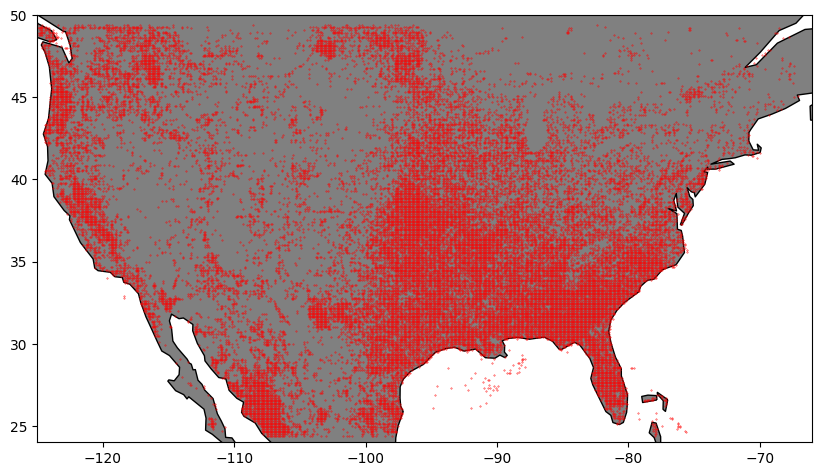

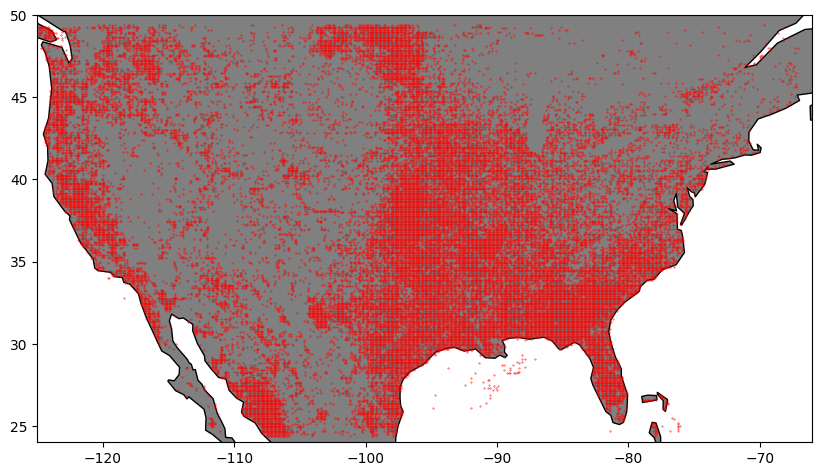

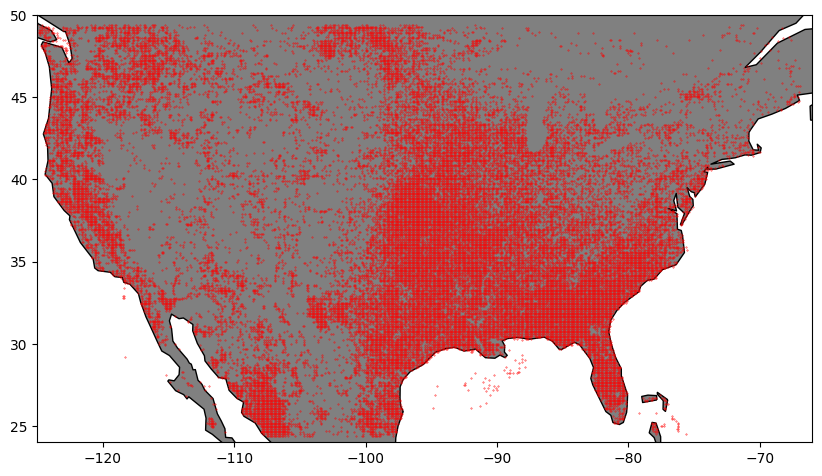

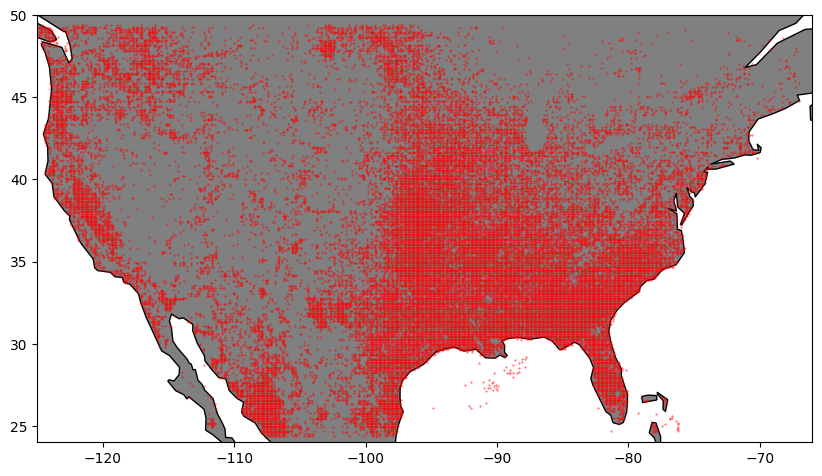

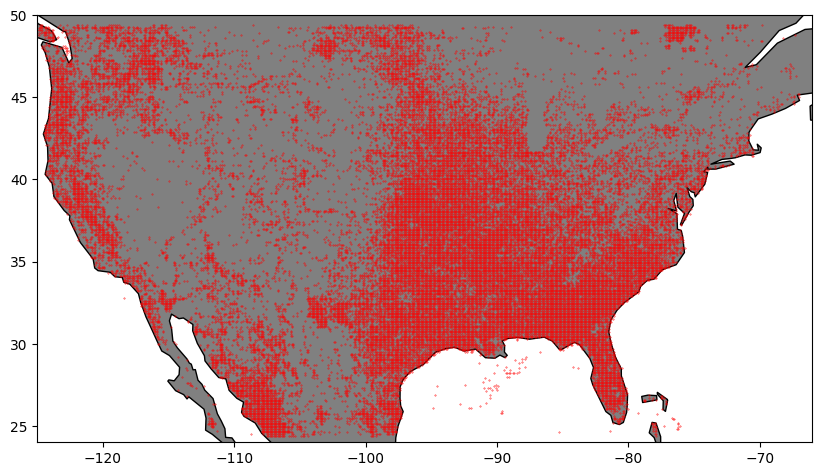

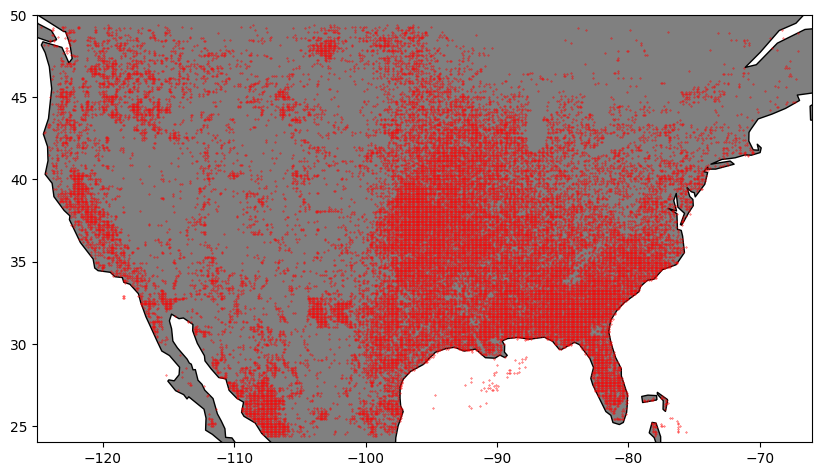

In [60]:
for year in years:
    lat_long_df=wildfire_df[['latitude','longitude','acq_date']].copy()
    lat_long_df['acq_date'] = pd.to_datetime(lat_long_df['acq_date'])
    lat_long_df = lat_long_df[lat_long_df['acq_date'].dt.year == int(year)]
    lat_long_df=lat_long_df[['latitude','longitude']].round(1).drop_duplicates()
    gdf = geopandas.GeoDataFrame(lat_long_df, geometry=geopandas.points_from_xy(lat_long_df.longitude,lat_long_df.latitude), crs="EPSG:4326")
    extent = [-125, 24, -66, 50]
    ax = world.plot(figsize=(10, 10), color="grey", edgecolor="black")
    ax.set_xlim([extent[0],  extent[2]])
    ax.set_ylim([extent[1],  extent[3]])
    gdf.plot(ax=ax, color="red", markersize=0.1)
    plt.show()

In [71]:
# Number of wild fires recorded on a yearly basis

In [74]:
year_df=wildfire_df[['acq_date']].copy()
year_df['acq_date']=pd.to_datetime(year_df['acq_date'])
year_df['year']=year_df['acq_date'].dt.year

acq_date  year
0       2000-11-01  2000
1       2000-11-01  2000
2       2000-11-01  2000
3       2000-11-01  2000
4       2000-11-01  2000
...            ...   ...
8056075 2024-09-01  2024
8056076 2024-09-01  2024
8056077 2024-09-01  2024
8056078 2024-09-01  2024
8056079 2024-09-01  2024

[8056080 rows x 2 columns]

<Axes: xlabel='year', ylabel='Count'>

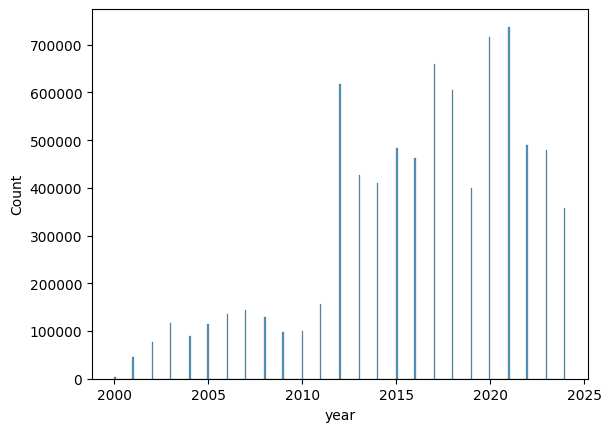

In [75]:
"""
Plot to see frequency of wildfires grouped by year
"""
sns.histplot(year_df['year'])

In [77]:
year_df['year'].describe().round(3)

count    8056080.000
mean        2016.285
std            5.393
min         2000.000
25%         2013.000
50%         2017.000
75%         2021.000
max         2024.000
Name: year, dtype: float64

In [125]:
state_coordinates_df=pd.read_csv('../Datasets/Bounding_boxes_us_states.csv')
state_coordinates_df.head()

State        xmin        xmax       ymin       ymax
0         Alabama  -88.473227  -84.889080  30.223334  35.008028
1          Alaska -179.148909  179.778470  51.214183  71.365162
2  American Samoa -171.089874 -168.143300 -14.548699 -11.046934
3         Arizona -114.816510 -109.045223  31.332177  37.004260
4        Arkansas  -94.617919  -89.644395  33.004106  36.499600

In [ ]:
state_coordinates=state_coordinates_df.values.tolist()

In [ ]:
"""
Performing analysis on the one American state that has had the most number of wildfires
"""

In [131]:
def find_state(lat,long,state_df):
    for index,row in state_df.iterrows():
        if((lat>=row['ymin']) and (lat<=row['ymax']) and (long>=row['xmin']) and (long<=row['xmax'])):
            return row['State']
    return "No state found"

In [132]:
wildfire_df['state']=wildfire_df.apply(lambda row: find_state(row['latitude'],row['longitude'],state_coordinates_df),axis=1)

In [146]:
wildfire_df.to_csv('../Datasets/wildfire_df.csv',index=False)

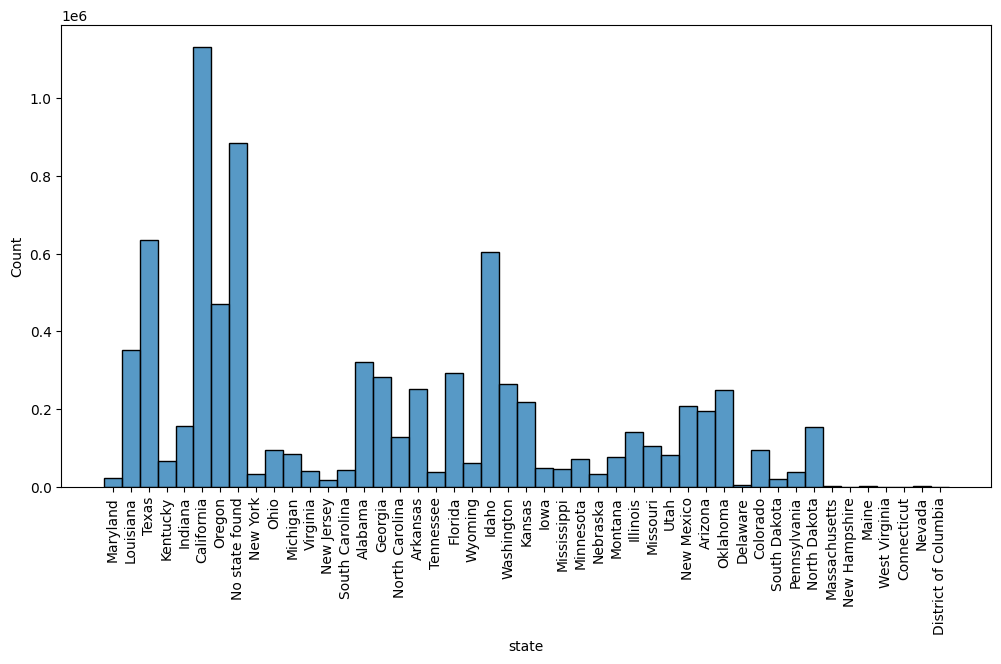

In [145]:
plt.figure(figsize=(12, 6))
sns.histplot(wildfire_df['state'])
plt.xticks(rotation=90)
plt.show()

### Exploring California

In [147]:
california_df=wildfire_df[(wildfire_df['longitude']>=-124.409591) & 
            (wildfire_df['longitude']<=-114.131211) &
            (wildfire_df['latitude']>=32.534156) & 
            (wildfire_df['latitude']<=42.009518)].copy()
california_df

latitude  longitude  bright_ti4  scan  track    acq_date  acq_time  \
14       38.44640 -120.38850      302.90  1.10   1.10  2000-11-01       608   
596      38.42630 -120.28980      304.50  1.40   1.20  2000-11-02      1851   
597      38.57530 -122.51100      300.30  1.90   1.30  2000-11-02      1851   
598      38.85750 -120.46420      311.00  1.40   1.20  2000-11-02      1851   
599      38.85910 -120.48030      346.60  1.40   1.20  2000-11-02      1851   
...           ...        ...         ...   ...    ...         ...       ...   
8055131  36.42392 -118.75639      334.53  0.46   0.39  2024-09-01      2040   
8055132  36.42488 -118.75132      346.29  0.46   0.39  2024-09-01      2040   
8055133  38.21450 -122.16364      351.95  0.40   0.44  2024-09-01      2040   
8055134  38.21539 -122.15946      343.38  0.40   0.44  2024-09-01      2040   
8055135  38.85100 -115.42913      346.54  0.38   0.36  2024-09-01      2040   

        satellite instrument confidence version  bright_ti5    frp daynight  \
14          Terra      MODIS          n    6.03      273.50  11.30        N   
596         Terra      MODIS          n    6.03      283.60  13.00        D   
597         Terra      MODIS          n    6.03      287.40   8.40        D   
598         Terra      MODIS          n    6.03      285.20  17.40        D   
599         Terra      MODIS          h    6.03      285.90  95.50        D   
...           ...        ...        ...     ...         ...    ...      ...   
8055131       N21      VIIRS          n  2.0NRT      304.05  13.86        D   
8055132       N21      VIIRS          n  2.0NRT      308.05  21.77        D   
8055133       N21      VIIRS          n  2.0NRT      311.77  16.92        D   
8055134       N21      VIIRS          n  2.0NRT      308.88   6.97        D   
8055135       N21      VIIRS          n  2.0NRT      311.67   8.18        D   

         type       state  
14        0.0  California  
596       0.0  California  
597       0.0  California  
598       0.0  California  
599       0.0  California  
...       ...         ...  
8055131   0.0  California  
8055132   0.0  California  
8055133   0.0  California  
8055134   0.0  California  
8055135   0.0  California  

[1139103 rows x 16 columns]

In [89]:
california_df['acq_date']=pd.to_datetime(california_df['acq_date'])
california_df[california_df['acq_date'].dt.year>=2011]

latitude  longitude  bright_ti4  scan  track   acq_date  acq_time  \
1054883  34.60330 -118.38480      305.80  1.20   1.10 2011-01-06      1857   
1054905  39.84670 -121.52100      308.20  1.10   1.00 2011-01-07       601   
1055064  35.07520 -120.57900      305.40  1.00   1.00 2011-01-07      2118   
1055065  39.74490 -121.28680      300.30  1.00   1.00 2011-01-07      2119   
1055229  32.70210 -115.41600      331.10  2.50   1.50 2011-01-08      2022   
...           ...        ...         ...   ...    ...        ...       ...   
8055131  36.42392 -118.75639      334.53  0.46   0.39 2024-09-01      2040   
8055132  36.42488 -118.75132      346.29  0.46   0.39 2024-09-01      2040   
8055133  38.21450 -122.16364      351.95  0.40   0.44 2024-09-01      2040   
8055134  38.21539 -122.15946      343.38  0.40   0.44 2024-09-01      2040   
8055135  38.85100 -115.42913      346.54  0.38   0.36 2024-09-01      2040   

        satellite instrument confidence version  bright_ti5     frp daynight  \
1054883     Terra      MODIS          n    6.03      279.10   12.80        D   
1054905     Terra      MODIS          h    6.03      277.90   13.50        N   
1055064      Aqua      MODIS          n    6.03      289.30    6.70        D   
1055065      Aqua      MODIS          n    6.03      280.40    7.30        D   
1055229      Aqua      MODIS          h    6.03      296.00  101.10        D   
...           ...        ...        ...     ...         ...     ...      ...   
8055131       N21      VIIRS          n  2.0NRT      304.05   13.86        D   
8055132       N21      VIIRS          n  2.0NRT      308.05   21.77        D   
8055133       N21      VIIRS          n  2.0NRT      311.77   16.92        D   
8055134       N21      VIIRS          n  2.0NRT      308.88    6.97        D   
8055135       N21      VIIRS          n  2.0NRT      311.67    8.18        D   

         type  
1054883   0.0  
1054905   0.0  
1055064   2.0  
1055065   0.0  
1055229   0.0  
...       ...  
8055131   0.0  
8055132   0.0  
8055133   0.0  
8055134   0.0  
8055135   0.0  

[1032531 rows x 15 columns]

###  Visualizing the wildfire trend across California from 2000-2024

In [86]:
years=['2000','2001','2002','2003','2004','2005','2006',
       '2007','2008','2009','2010','2011','2012','2013',
       '2014','2015','2016','2017','2018','2019','2020',
       '2021','2022','2023','2024']

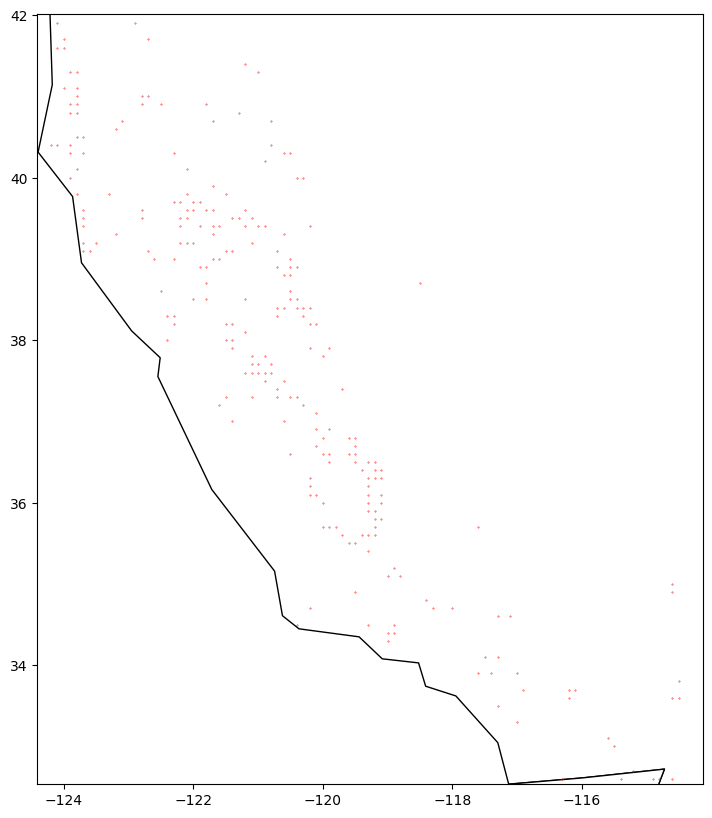

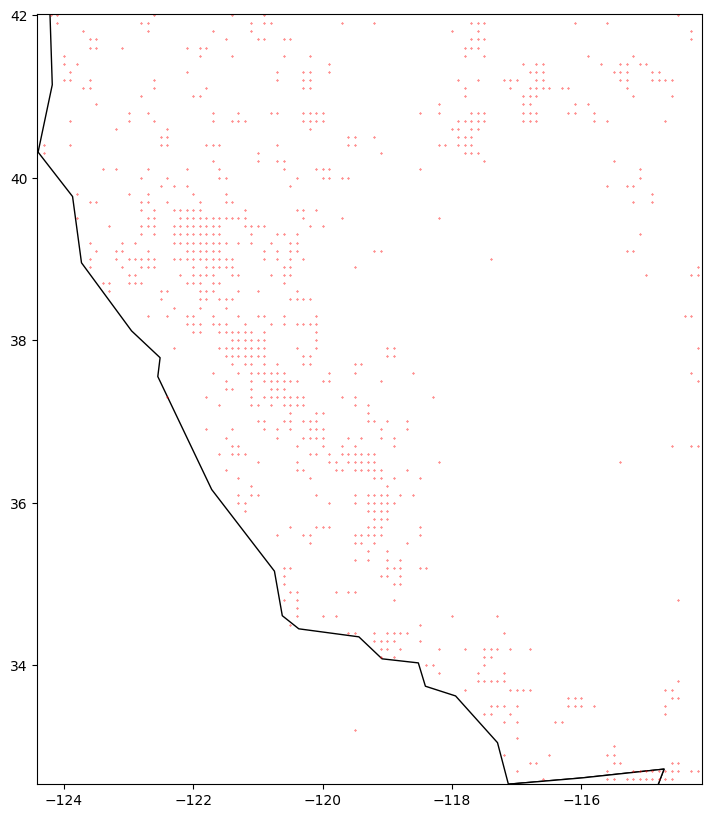

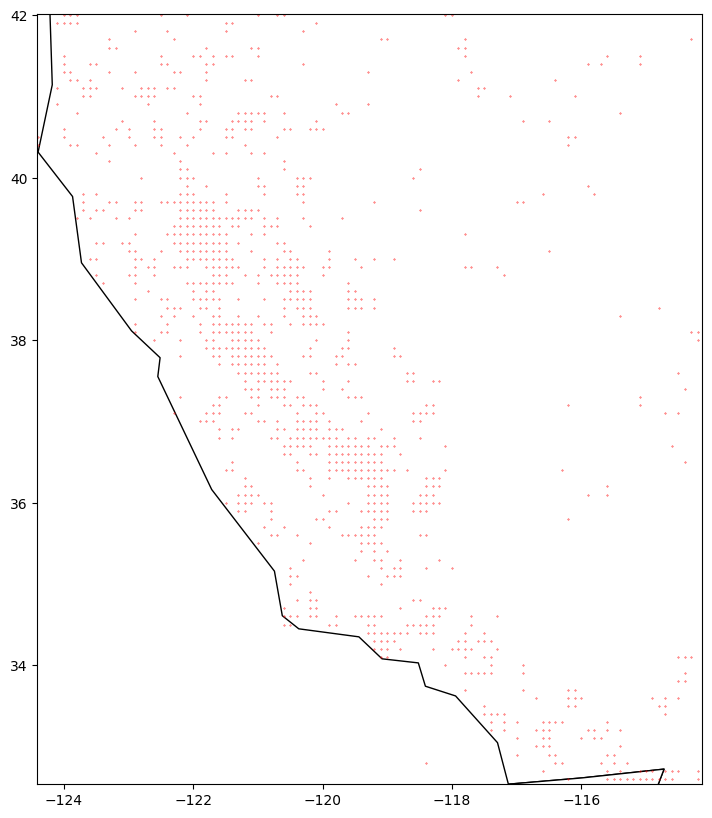

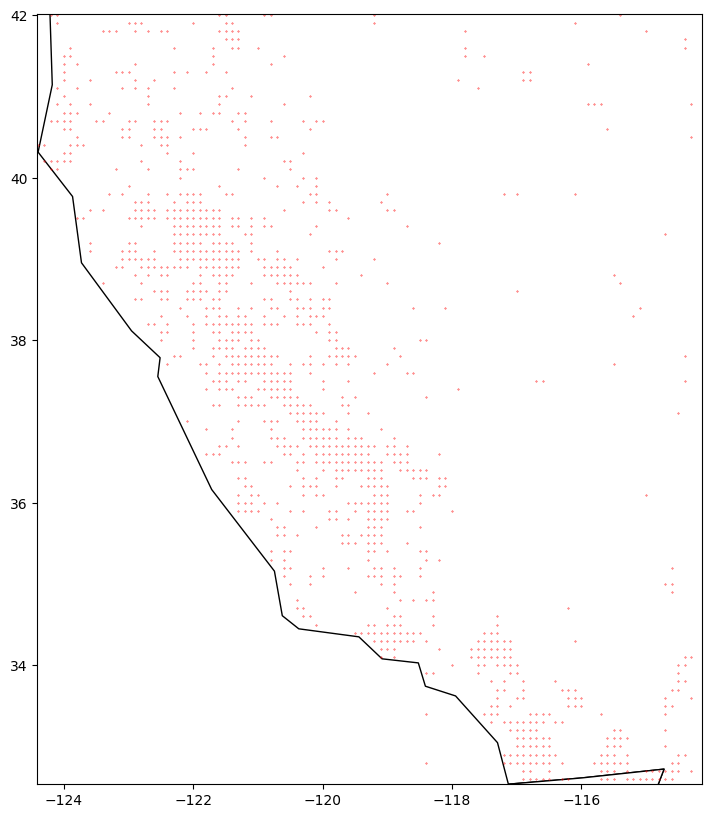

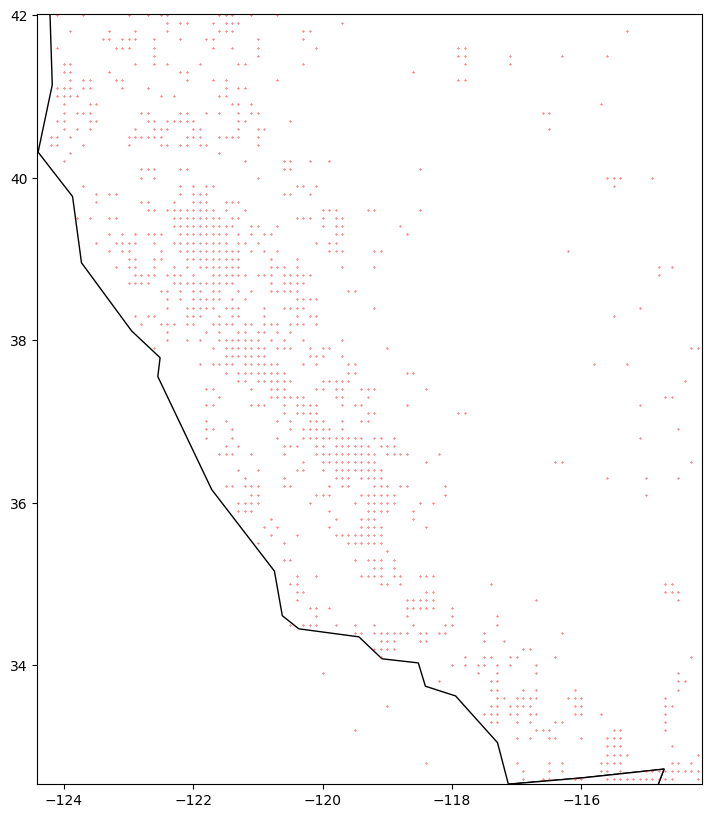

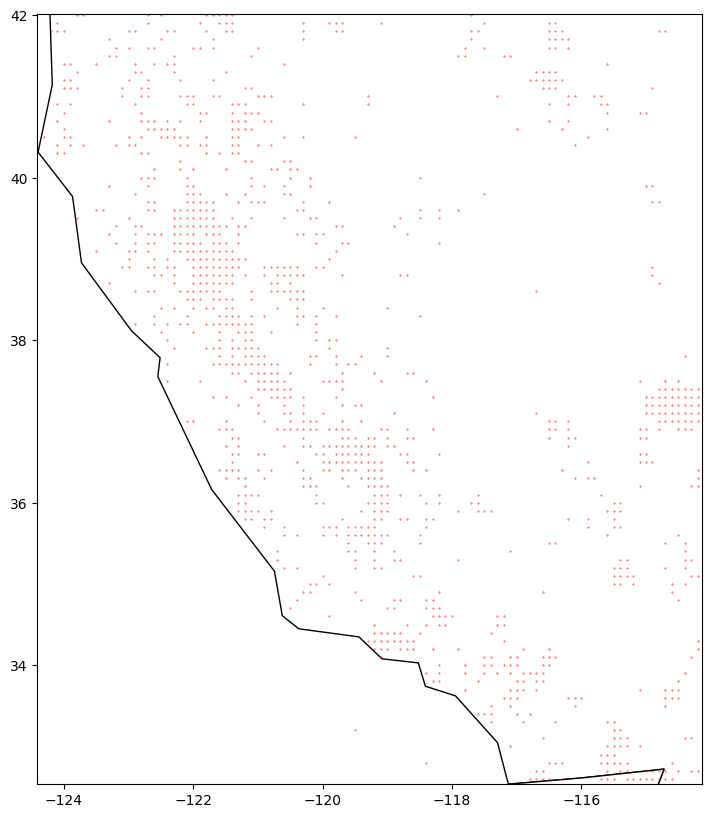

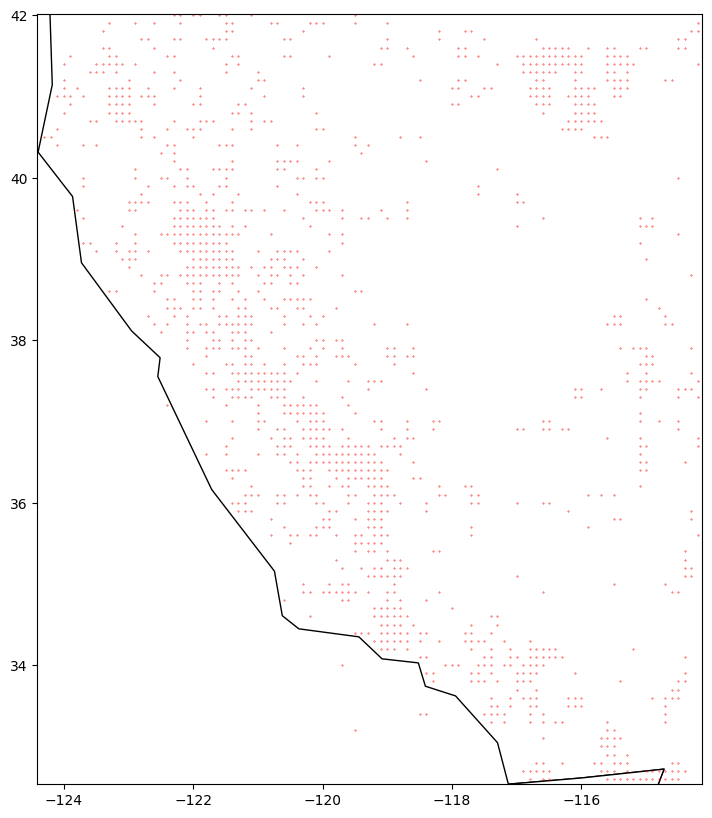

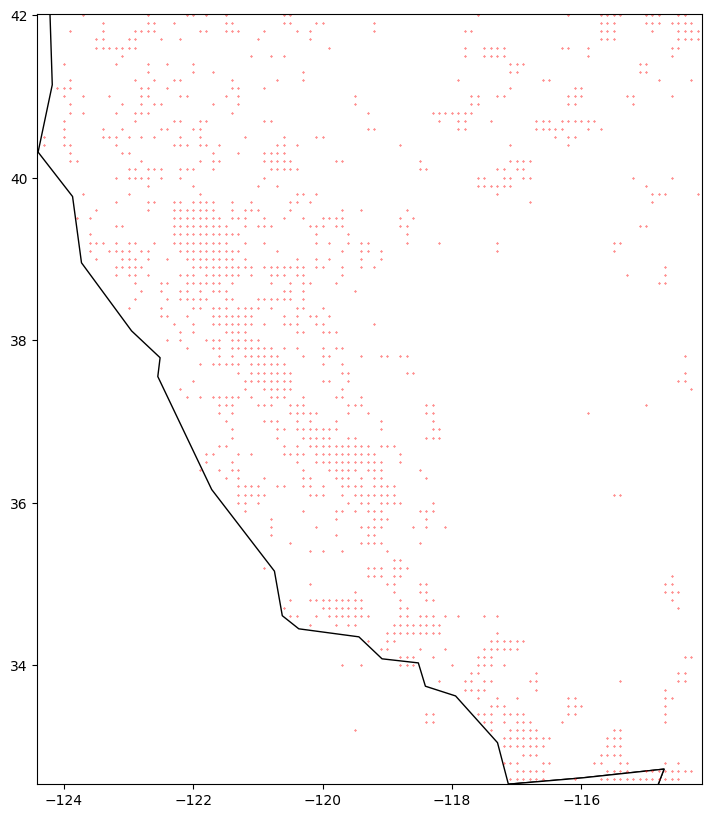

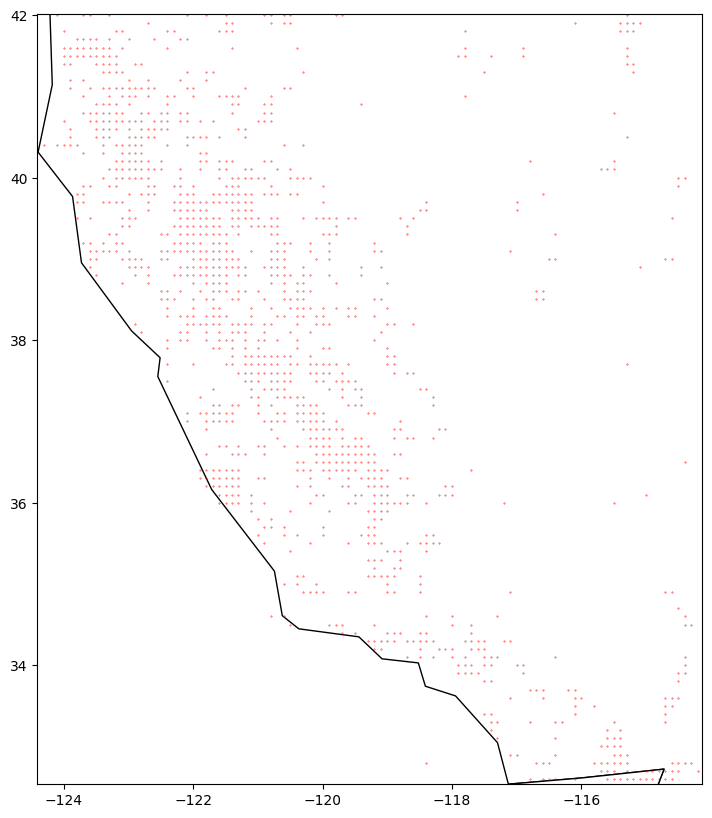

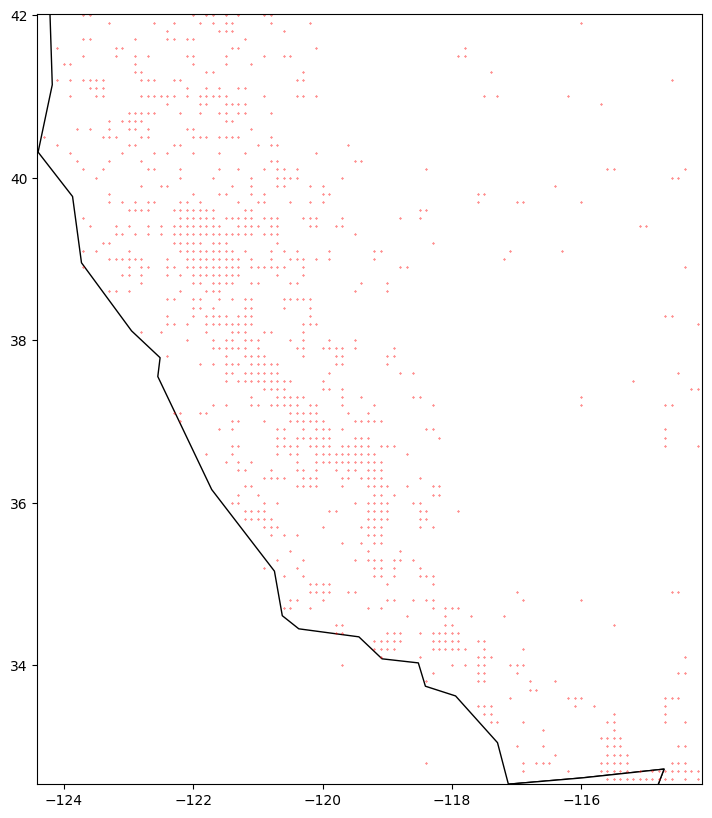

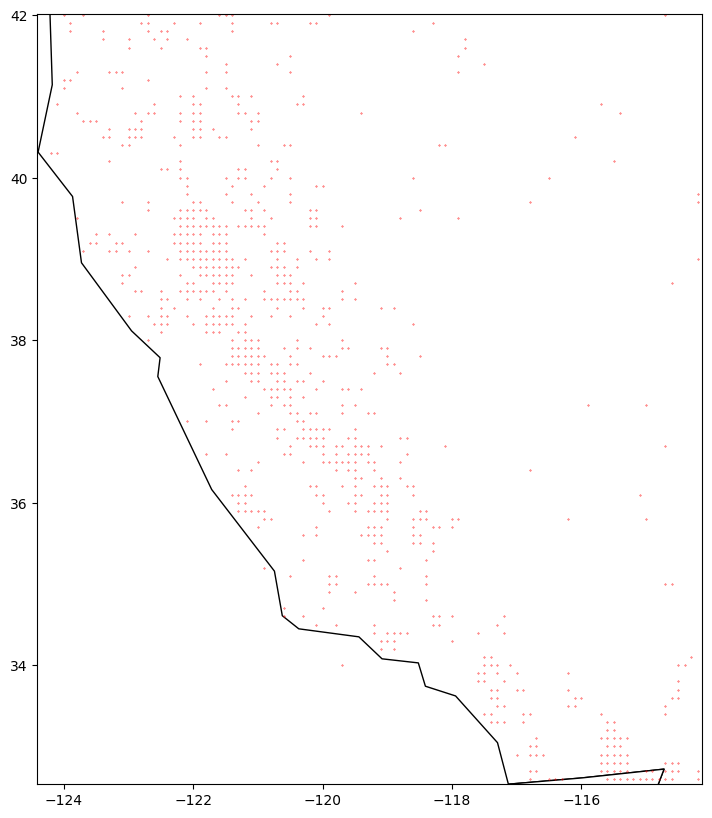

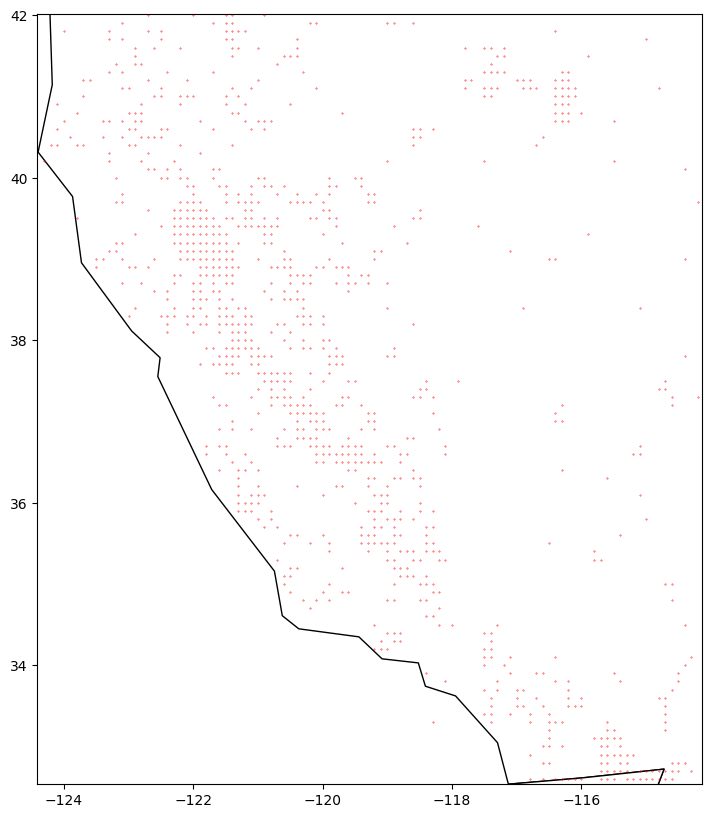

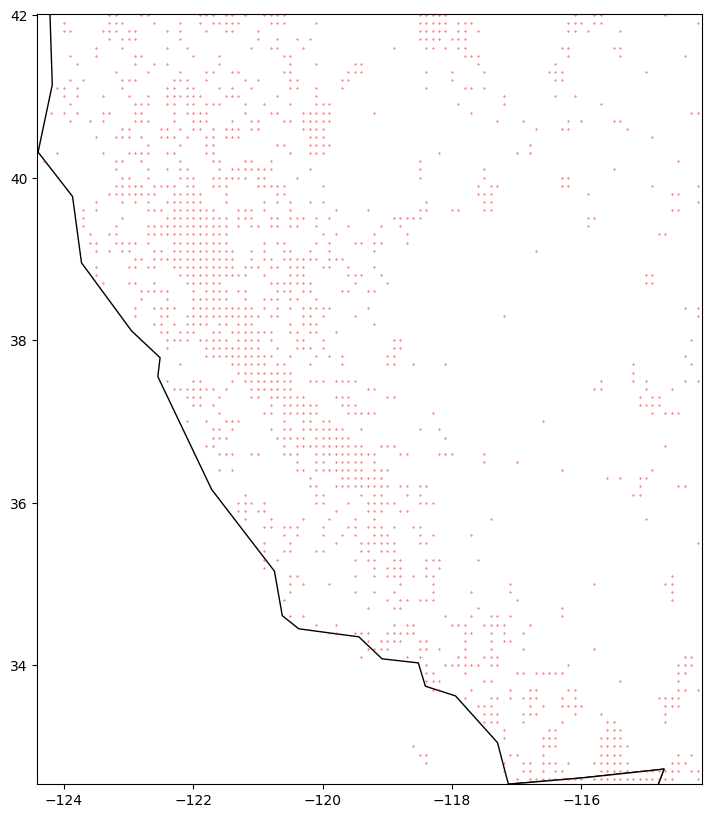

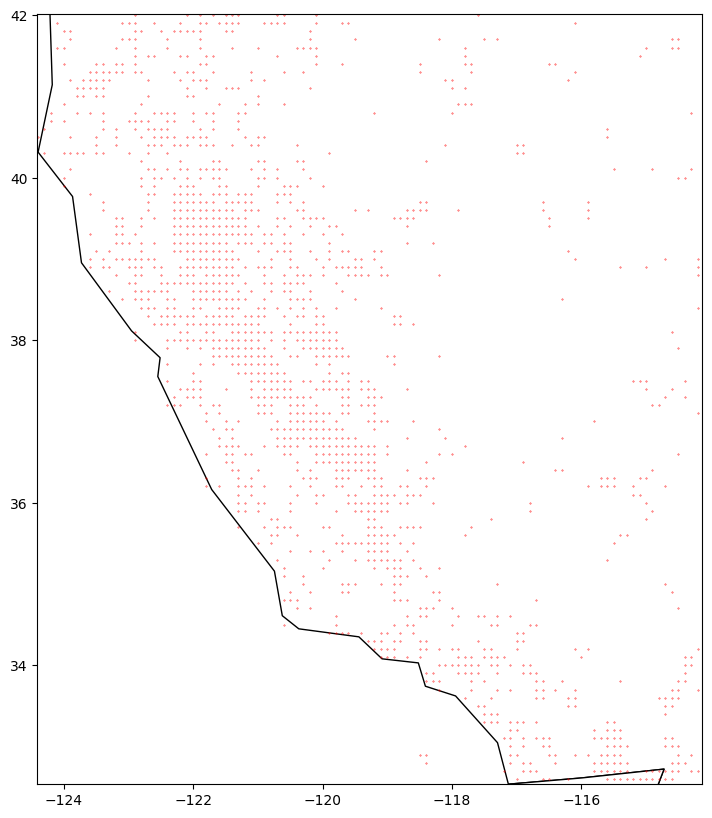

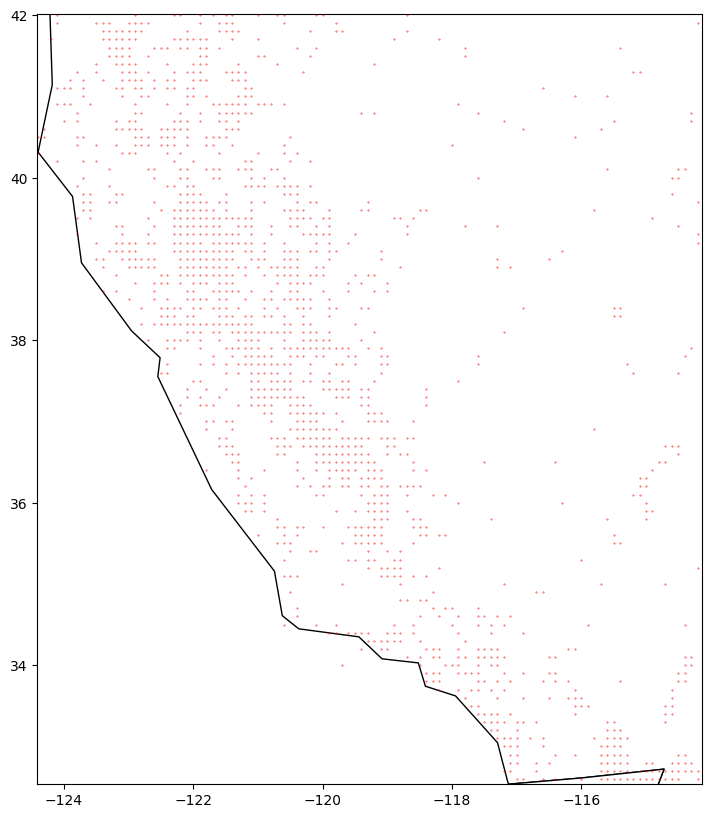

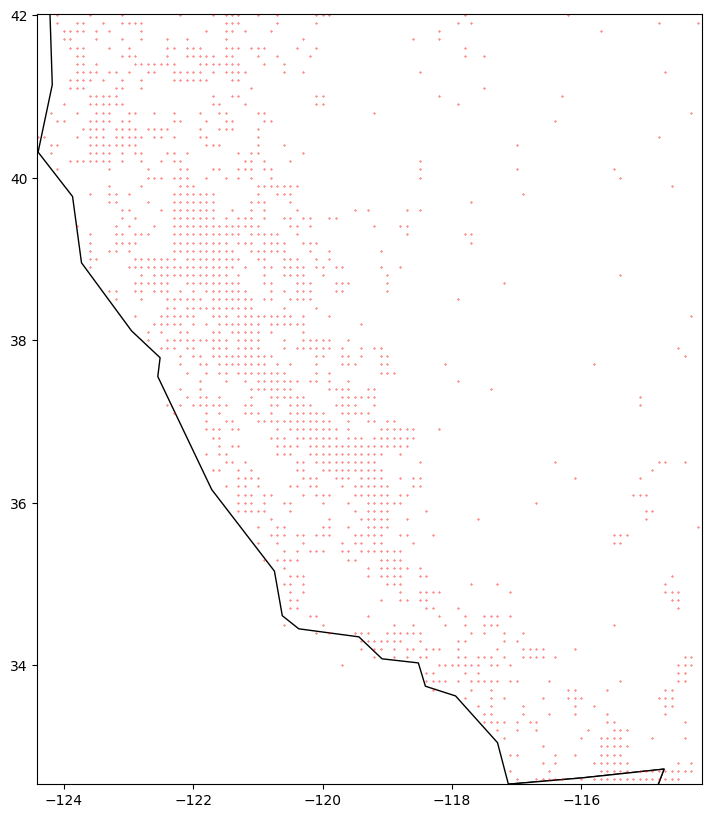

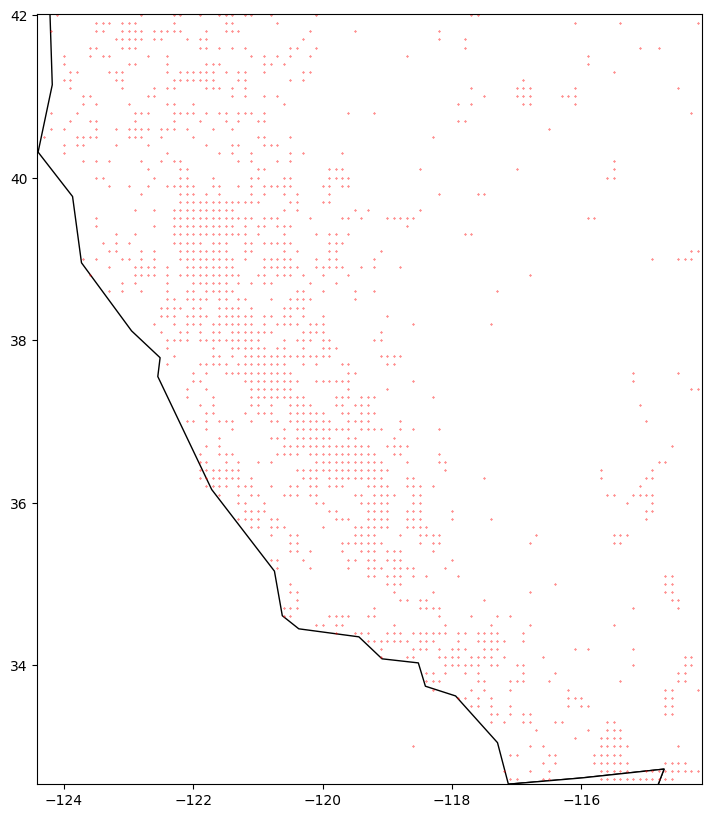

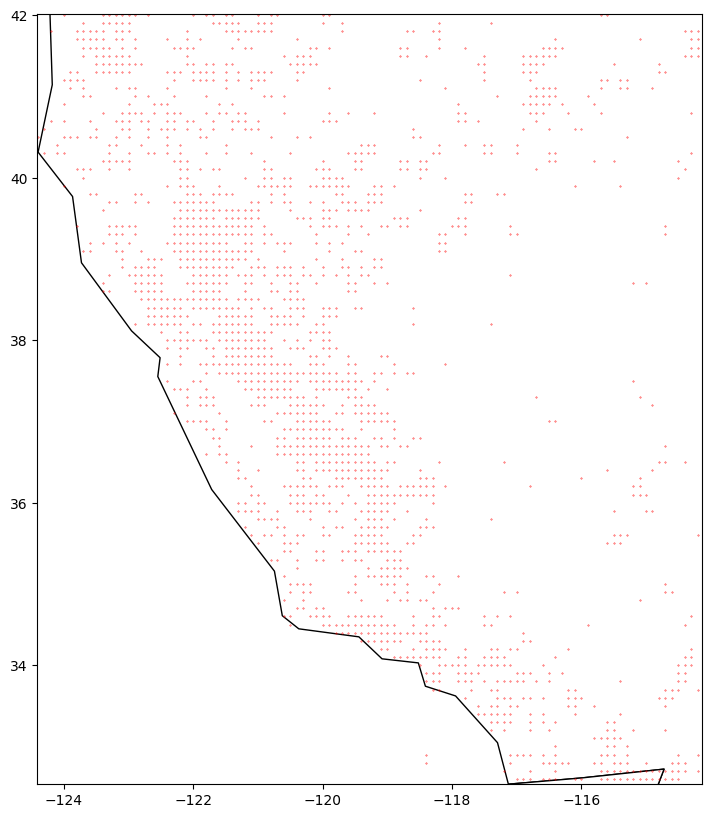

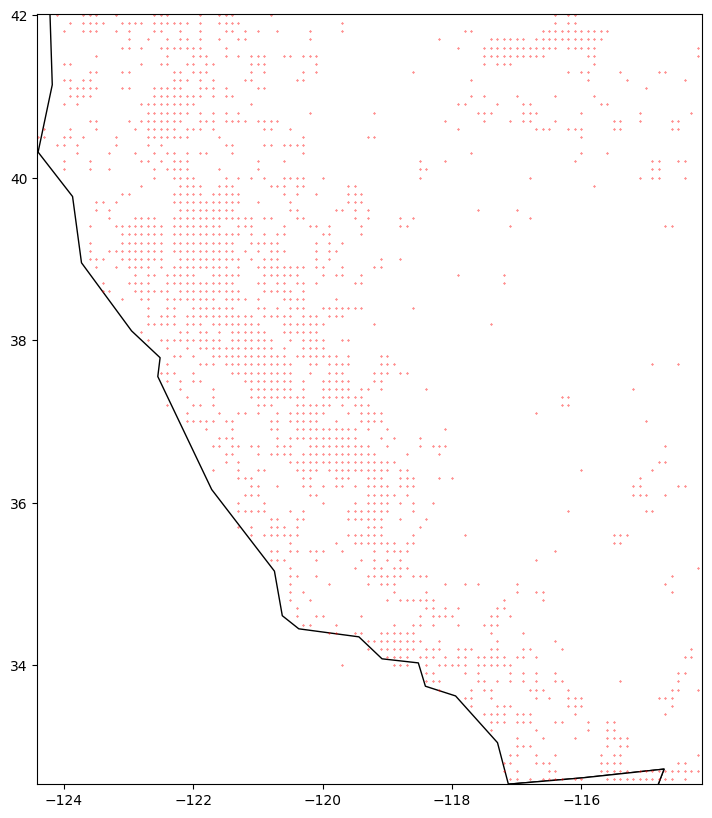

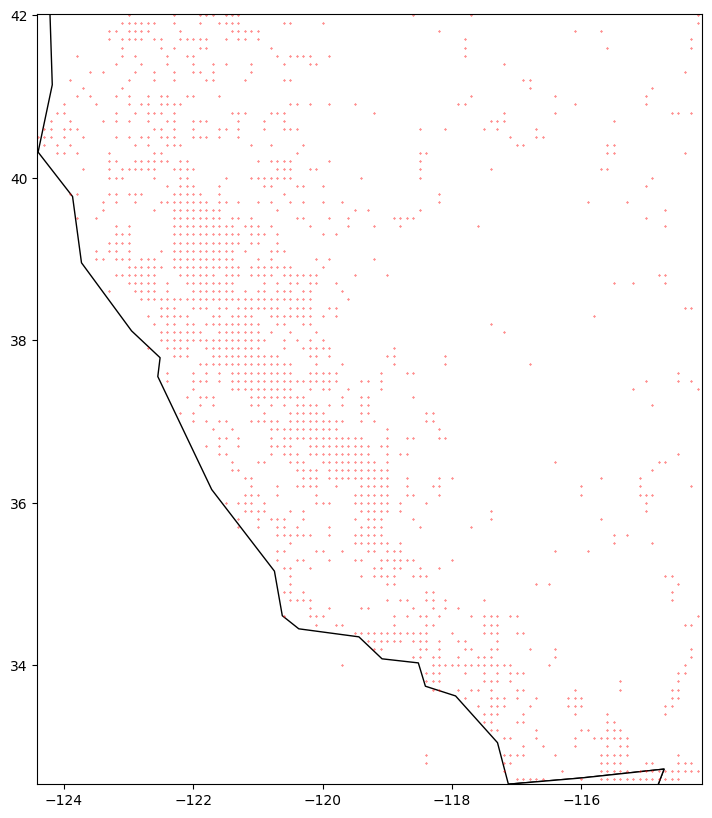

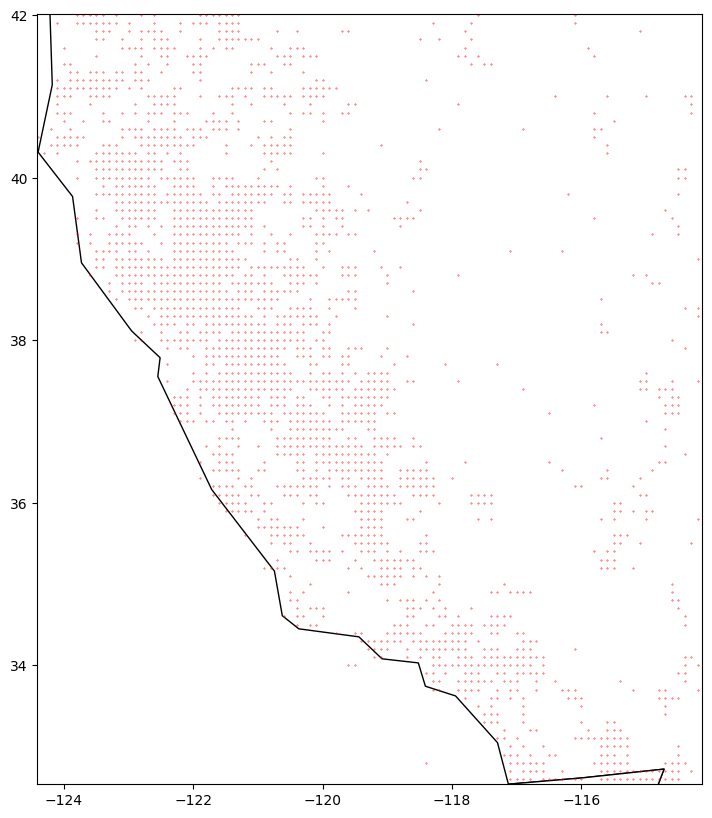

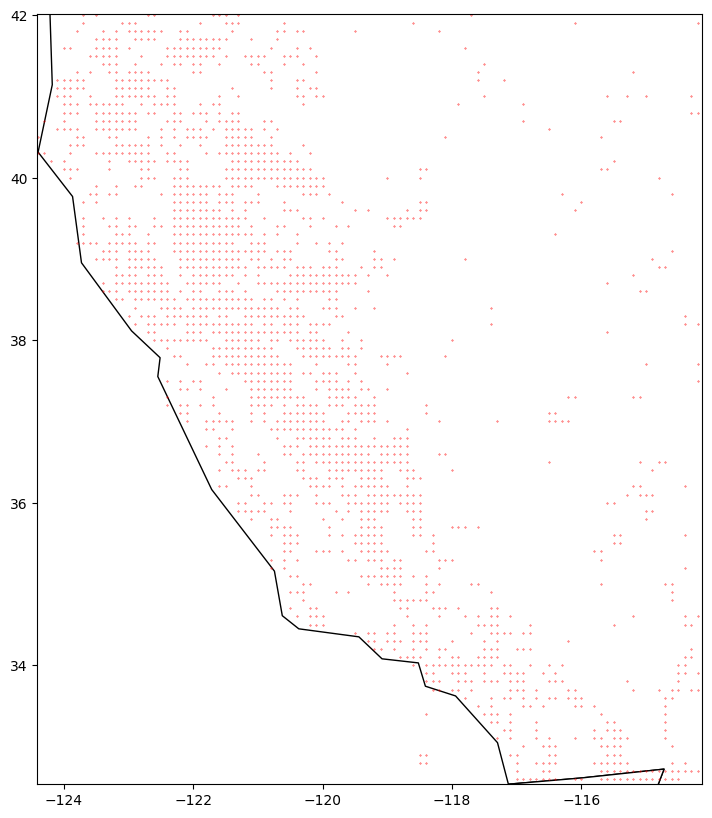

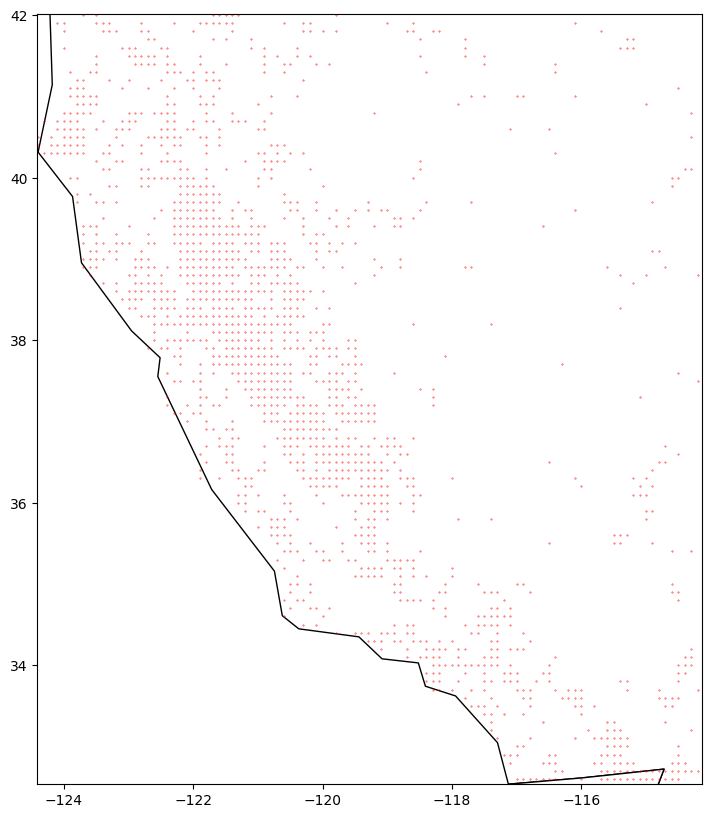

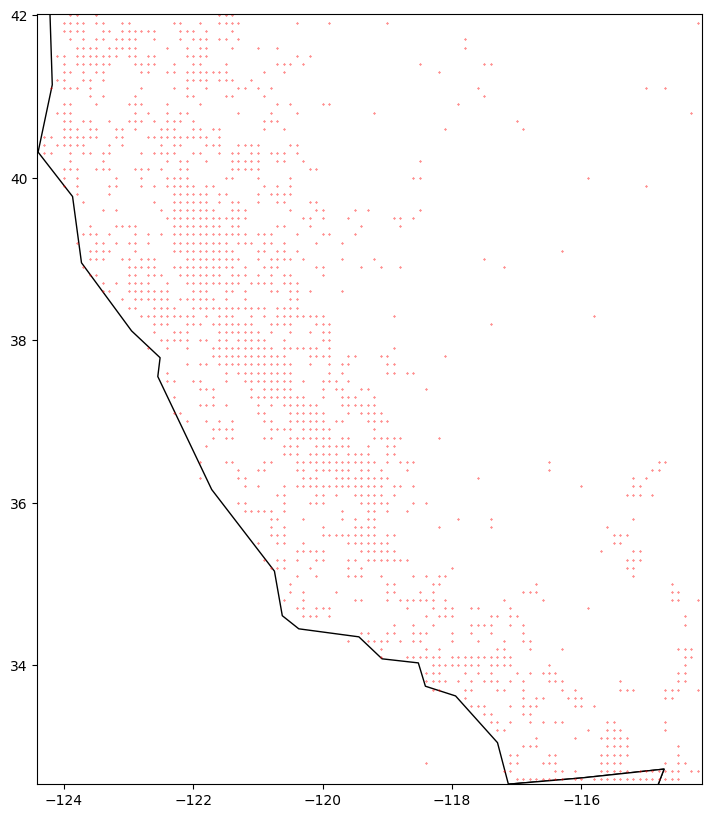

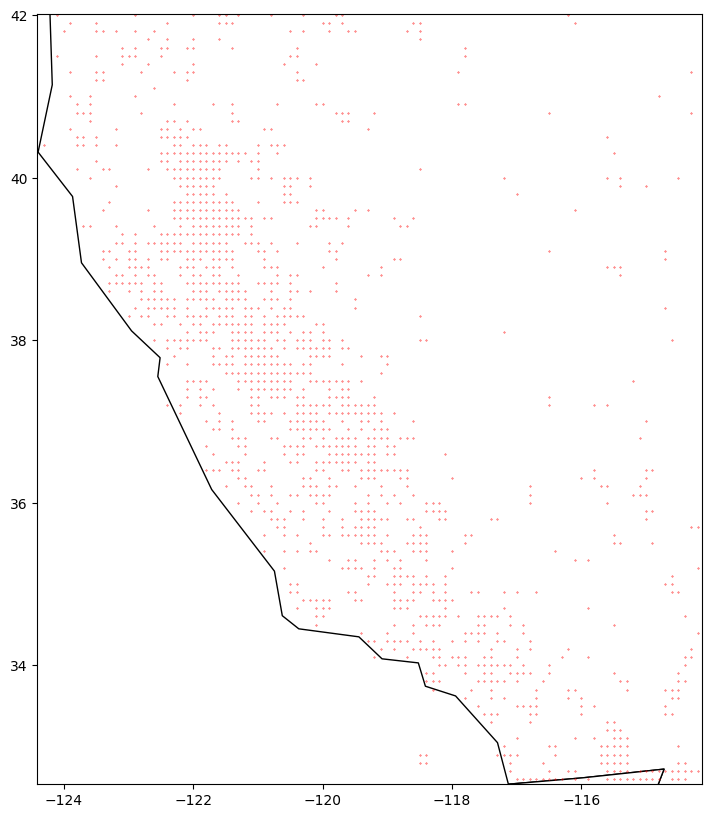

In [87]:
for year in years:
    lat_long_df=california_df[['latitude','longitude','acq_date']].copy()
    lat_long_df['acq_date'] = pd.to_datetime(lat_long_df['acq_date'])
    lat_long_df = lat_long_df[lat_long_df['acq_date'].dt.year == int(year)]
    lat_long_df=lat_long_df[['latitude','longitude']].round(1).drop_duplicates()
    gdf = geopandas.GeoDataFrame(lat_long_df, geometry=geopandas.points_from_xy(lat_long_df.longitude,lat_long_df.latitude), crs="EPSG:4326")
    extent = [-124.409591,32.534156,-114.131211,42.009518]
    ax = world.plot(figsize=(10, 10), color="white", edgecolor="black")
    ax.set_xlim([extent[0],  extent[2]])
    ax.set_ylim([extent[1],  extent[3]])
    gdf.plot(ax=ax, color="red", markersize=0.1)
    plt.show()

In [117]:
def month_nam(month):
    month_names = {
        1: "January", 2: "February", 3: "March", 4: "April", 5: "May", 
        6: "June", 7: "July", 8: "August", 9: "September", 10: "October", 
        11: "November", 12: "December"
    }
    return month_names.get(month)

month_df=california_df[['acq_date']].copy()
month_df['month']=month_df['acq_date'].dt.month
month_df=month_df.groupby(['month']).count().reset_index().rename(columns={'acq_date':'frequency'})
month_df['month']=month_df['month'].apply(month_nam)

In [ ]:
"""
Plot to see frequency of wildfire by month in California
"""

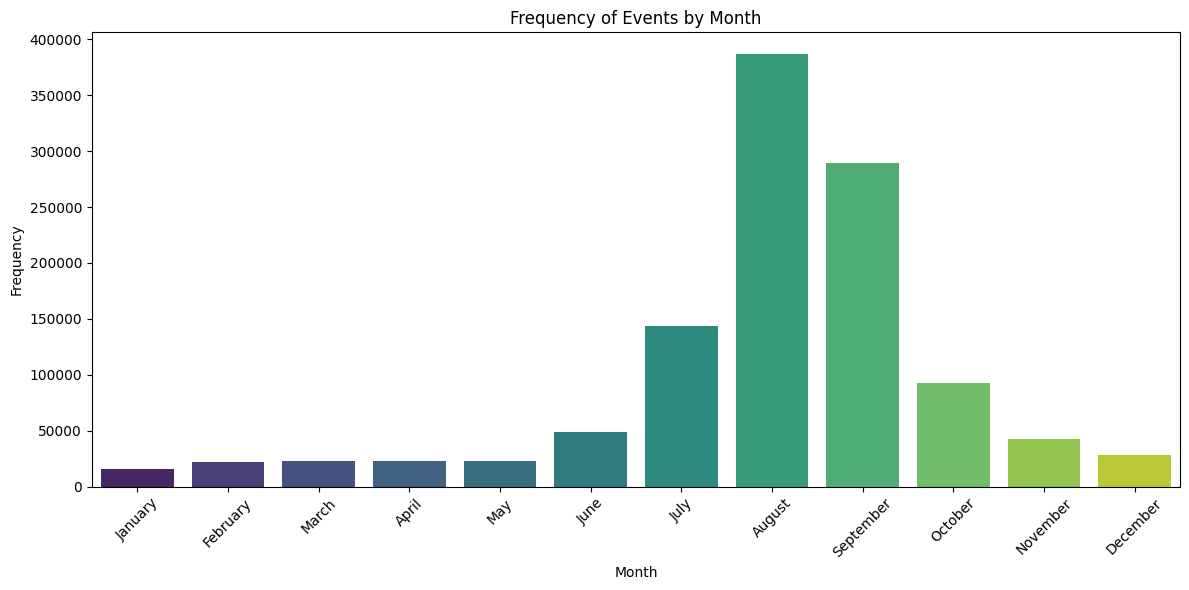

In [118]:
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='frequency', data=month_df, palette='viridis')

# Customize the plot
plt.xticks(rotation=45)  # Rotate month labels for better readability
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Frequency of Events by Month')

# Display the plot
plt.tight_layout()
plt.show()